# PyTorch入门

随着神经网络，特别是深度神经网络的出现，如何使用计算机高效的完成参数量巨大的神经网络的训练就成了一个难题。为此，出现了诸如TensorFlow、PyTorch等深度学习框架。在工业界中，TensorFlow出现的早而且应用较多，而PyTorch虽然出现的晚，不过由于其与Python结合更加紧密，且具有动态图等一系列优良特性，我们在这里以PyTorch为例讲解深度学习框架的使用。

在这一节中，我们首先学习PyTorch的一些基础操作。

# Tensor的使用

在机器学习中，Tensor是向量、矩阵的一个自然推广，即一个任意维的数组，比如：标量、向量（1维数组）、矩阵（2维数组）以及更高维的数组都可以看作是Tensor。

## Tensor的创建

在PyTorch中提供了Tensor数据类型，其使用方法与NumPy类似，但是也有一些差别。比如，为了创建一个Tensor，使用torch中的 **tensor()** 函数就可以了，这与NumPy里面的numpy.array()函数用法是一样的：

In [1]:
import torch
a=torch.tensor([1.,2,3,4])
a

tensor([1., 2., 3., 4.])

也可以通过NumPy的array创建：

In [2]:
import numpy as np
b=np.random.random(5)
b_torch=torch.from_numpy(b)
b_torch

tensor([0.4747, 0.7183, 0.4874, 0.3700, 0.5225], dtype=torch.float64)

反过来，也可以使用Tensor的numpy()函数转化为NumPy的array，此时也是共享内存的：

In [3]:
a=torch.tensor([1.,2,3,4])
b=a.numpy()
print("b=",b)
b[0]=10
print("b=",b)
print("a=",a)

b= [1. 2. 3. 4.]
b= [10.  2.  3.  4.]
a= tensor([10.,  2.,  3.,  4.])


或者，使用 **Tensor()** （*注意大小写！*）需要创建的Tensor的维数，从而创建一个未初始化的tensor：

In [4]:
c=torch.Tensor(10,3)
c

tensor([[2.5226e-18, 2.4283e-18, 2.6302e+20],
        [6.1949e-04, 1.0256e-08, 1.0255e-08],
        [3.1129e+12, 6.7735e-10, 2.5790e-09],
        [4.4159e-05, 1.2821e+16, 1.2849e+31],
        [1.8395e+25, 6.1963e-04, 1.0742e-05],
        [6.7576e-07, 1.3369e+22, 4.2422e-08],
        [8.5491e+20, 4.2770e-05, 8.4338e-07],
        [1.0733e-08, 2.3052e-12, 7.1856e+22],
        [4.3605e+27, 2.5226e-18, 1.0646e+24],
        [3.2316e-18, 1.8788e+31, 7.9303e+34]])

使用torch.Tensor()也可以转化NumPy的array为Tensor，两者的区别是使用b=torch.from_numpy(a)函数引入时，a和b是共享内存的；而如果使用b=torch.Tensor(a)函数时，如果a的类型不是Float32，则会新建，此时可能不共享内存。

In [5]:
b_torch1=torch.Tensor(b)
b_torch1

tensor([10.,  2.,  3.,  4.])

注意以上新创建的Tensor的值是凌乱的，因为没有对其进行初始化，所以里面的值是完全无意义的。

几乎所有的神经网络工具箱都需要支持GPU计算，而GPU计算最常用的工具是NVIDIA公司的CUDA工具箱。如果你有支持CUDA的显卡，并且配置好了CUDA，可以在创建时通过 **cuda()** 函数将Tensor放在显卡的内存（显存）中，而非内存中：

In [6]:
if torch.cuda.is_available():
    ac=torch.tensor([1.,2,3,4]).cuda()
ac

tensor([1., 2., 3., 4.], device='cuda:0')

其中我们使用了“torch.cuda.is_available()”来判断计算机上是否有GPU和CUDA可用。上面的结果除了展示了Tensor的取值之外，还有一个 *device='cuda:0'* ，显示了这个Tensor所出的CUDA设备编号为0。如果有不止一块GPU，可以在括号中加入数字（从0开始计数），指定将其放在哪一块GPU上。

我们可以使用cup()函数和cuda()函数在两者之间转换：

In [7]:
ac_cpu=ac.cpu()
ac_cpu

tensor([1., 2., 3., 4.])

另一种直接将Tensor放到GPU中的方法是在创建Tensor时直接指定其所处的device，比如：

In [8]:
gpu_tensor=torch.tensor([0.,1],device=0)
gpu_tensor

tensor([0., 1.], device='cuda:0')

接下来介绍的创建Tensor的函数也都支持这种创建方法，特别是如果该Tensor需要被求导，一定要使用这种方法进行创建。

在这里值得一提的是Tensor的数据类型。在PyTorch中，Tensor有如下数据类型可以使用：
* 浮点类型
  * torch.FloatTensor（torch.cuda.FloatTensor）: 32位浮点型
  * torch.DoubleTensor（torch.cuda.DoubleTensor）: 64位浮点型
  * （torch.cuda.HalfTensor）: 16位浮点型
* 整型
  * torch.IntTensor（torch.cuda.IntTensor）: 32位整型
  * torch.LongTensor（torch.cuda.LongTensor）: 64位整型
  * torch.ShortTensor（torch.cuda.ShortTensor）: 16位整型
  * torch.ByteTensor（torch.cuda.ByteTensor）：8位无符号整型
  * torch.CharTensor（torch.cuda.CharTensor）：8位有符号整型
  
其中括号里面表示的是在CUDA中的类型。

不管是在CPU上还是GPU上，位数更小的类型总是需要更少的内存（显存），并且具有更高的计算速度。然而位数更小的类型可能具有更差的精度或者更高的误差（特别是对于浮点类型）、更小的表示范围（特别是对于整数类型），所以在创建Tensor时可以按照需求指定类型。

我们可以使用Tensor.type()函数展示其类型：

In [9]:
print(ac.type())
print(c.type())

torch.cuda.FloatTensor
torch.FloatTensor


根据上面的输出可以知道，默认的类型是32位浮点型，我们可以使用double()（以及float(), int(), long(), short()等）将其换为64位浮点型：

In [10]:
ac_64=ac.double()
print(ac_64.type())
ac_64

torch.cuda.DoubleTensor


tensor([1., 2., 3., 4.], device='cuda:0', dtype=torch.float64)

也可以使用type_as()方法产生相同类型的Tensor：

In [11]:
d=c.double()
e=torch.tensor([1,2,3])
print("e的类型：", e.type())
e_64=e.type_as(d)
print("e_64的类型：", e_64.type())
print(e)
print(e_64)

e的类型： torch.LongTensor
e_64的类型： torch.DoubleTensor
tensor([1, 2, 3])
tensor([1., 2., 3.], dtype=torch.float64)


如果需要改变所有的默认类型，可以使用torch.set_default_tensor_type()函数，比如：

In [12]:
a=torch.tensor([1.,2,3,4])
print(a.type())
torch.set_default_tensor_type("torch.DoubleTensor")
a=torch.tensor([1.,2,3,4])
print(a.type())

torch.FloatTensor
torch.DoubleTensor


一般而言，32位的浮点数已经足够用了，用Double会比较慢，特别是涉及到神经网络中大规模的计算，使用Double的计算开销比较大，所以不妨换回去：

In [13]:
torch.set_default_tensor_type("torch.FloatTensor")

与NumPy类似，PyTorch也有很多创建特殊Tensor的方法，比如：

* 全为0的Tensor：torch.zeors()
* 全为1的Tensor：torch.ones()
* 单位阵：torch.eye()
* U(0,1)的随机数：torch.rand()
* 标准正态分布的随机数：torch.randn()
* 从start到end，步长为step：torch.arange(start,end,step)
* 从start到end，切成m份：torch.linspace(start,end,m)
* 从10^start到10^end，切成m份：torch.linspace(start,end,m)
* 随机排列：torch.randperm(m)

比如：

In [14]:
a=torch.zeros(5,4)
print("维数为5-by-4的全为0的矩阵：\n",a)
b=torch.ones(5,4)
print("维数为5-by-4的全为1的矩阵：\n",b)
c=torch.eye(5,4)
print("维数为5-by-4的单位阵：\n",c)
d=torch.rand(5,4)
print("维数为5-by-4的(0,1)上均匀分布随机数矩阵：\n",d)
e=torch.randn(5,4)
print("维数为5-by-4的标准正态分布矩阵：\n",e)
f=torch.arange(1,10,2)
print("从1到10，步长为2：\n",f)
g=torch.linspace(1,10,5)
print("从1到10，4等分（5个数字）：：\n",g)
h=torch.logspace(0,3,5)
print("从10^1到10^3，4等分（5个数字）：：\n",h)
i=torch.randperm(10)
print("0-9共10个数字的随机排列：\n",i)

维数为5-by-4的全为0的矩阵：
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
维数为5-by-4的全为1的矩阵：
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
维数为5-by-4的单位阵：
 tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.]])
维数为5-by-4的(0,1)上均匀分布随机数矩阵：
 tensor([[0.6020, 0.5441, 0.5856, 0.7988],
        [0.6134, 0.1271, 0.2163, 0.9762],
        [0.6383, 0.6502, 0.6935, 0.2093],
        [0.6550, 0.5483, 0.5632, 0.7308],
        [0.2645, 0.0876, 0.1185, 0.2220]])
维数为5-by-4的标准正态分布矩阵：
 tensor([[-1.2419, -0.2136, -0.1664,  0.0914],
        [-1.2820,  2.1861,  0.4065,  0.7992],
        [-0.8263,  0.0376,  0.0894, -1.3201],
        [ 1.3348, -0.4670, -0.0110, -0.5706],
        [ 0.0285, -0.5255,  0.6941, -0.1094]])
从1到10，步长为2：
 tensor([1, 3, 5, 7, 9])
从1到10，4等分（5个数字）：：
 tensor

此外，还可以使用如下命令产生形状相同的Tensor：

* 创建与T形状相同的全为1的Tensor：torch.ones_like(T)
* 创建与T形状相同的全为0的Tensor：torch.zeros_like(T)

In [15]:
j=torch.ones_like(i)
print("与i形状相同的全为1的Tensor：\n",j)
k=torch.zeros_like(g)
print("与g形状相同的全为0的Tensor：\n",k)

与i形状相同的全为1的Tensor：
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
与g形状相同的全为0的Tensor：
 tensor([0., 0., 0., 0., 0.])


与NumPy类似，对于一个Tensor，可以通过shape、size等属性和方法查看Tensor的形状，但是值得注意的是PyTorch的方法、属性与NumPy略有区别：

In [16]:
import numpy as np

np_a=np.random.random((5,6))
print("np_a=\n",np_a)
print("np_a的维度：",np_a.ndim)
print("np_a的形状：",np_a.shape)
print("np_a的长度：",np_a.size)

np_a=
 [[0.21422382 0.54820966 0.79365428 0.55436866 0.15047506 0.56382258]
 [0.05188425 0.1989038  0.81829428 0.10692992 0.11062693 0.7592232 ]
 [0.33192594 0.56906178 0.54607819 0.53289741 0.72319379 0.80647581]
 [0.56667187 0.13195161 0.40448738 0.92007398 0.17874402 0.51145901]
 [0.38482554 0.4656725  0.23312931 0.94514266 0.1329835  0.99353232]]
np_a的维度： 2
np_a的形状： (5, 6)
np_a的长度： 30


In [17]:
print("a=\n",np_a)
print("a的维度：",a.dim())
print("a的形状：",a.shape)
print("a的长度：",a.size())
print("a的元素的个数：",a.numel())

a=
 [[0.21422382 0.54820966 0.79365428 0.55436866 0.15047506 0.56382258]
 [0.05188425 0.1989038  0.81829428 0.10692992 0.11062693 0.7592232 ]
 [0.33192594 0.56906178 0.54607819 0.53289741 0.72319379 0.80647581]
 [0.56667187 0.13195161 0.40448738 0.92007398 0.17874402 0.51145901]
 [0.38482554 0.4656725  0.23312931 0.94514266 0.1329835  0.99353232]]
a的维度： 2
a的形状： torch.Size([5, 4])
a的长度： torch.Size([5, 4])
a的元素的个数： 20


可以发现：

* NumPy中array的ndim, shape, size都是属性
* PyTorch中Tensor的dim(), size()都是函数，shape为属性
* NumPy中size代表元素的个数，而PyTorch中Tensor元素的个数是使用numel()方法。

## 索引、视图与形状调整与

与NumPy类似，Tensor也可以通过切片等操作产生Tensor的视图（view），与NumPy一样，视图并不会对Tensor进行复制，仅仅是一个引用。与NumPy类似，可以使用切片操作：

In [18]:
a=torch.tensor([1,2,3,4])
print("a=",a)
b=a[0:2]
print("b=",b)
b[0]=3
print("b=",b)
print("a=",a)

a= tensor([1, 2, 3, 4])
b= tensor([1, 2])
b= tensor([3, 2])
a= tensor([3, 2, 3, 4])


跟NumPy类似的是，也可以使用掩码操作，不过掩码操作所创建的是一个拷贝，而非视图：

In [19]:
a=torch.tensor([1,2,3,4])
print("a=",a)
c=a[a>=3]
print("c=",c)
c[-1]=5
print("c=",c)
print("a=",a)
print("b=",b)

a= tensor([1, 2, 3, 4])
c= tensor([3, 4])
c= tensor([3, 5])
a= tensor([1, 2, 3, 4])
b= tensor([3, 2])


如果需要调整Tensor的形状，可以使用Tensor的view()函数以及reshape()方法，其中view()和reshape()接受的参数为修改后的形状，区别在于view()一定会创建视图，而reshape()则不一定，也可能创建原Tensor的拷贝。

In [20]:
a=torch.tensor([1,2,3,4])
print("a=",a)
b=a.view(2,2)
print("b=\n",b)
c=a.reshape(2,2)
print("c=\n",c)
print("现在对b重新赋值")
b[0,0]=1
print("a=",a)
print("b=\n",b)
print("c=\n",c)

a= tensor([1, 2, 3, 4])
b=
 tensor([[1, 2],
        [3, 4]])
c=
 tensor([[1, 2],
        [3, 4]])
现在对b重新赋值
a= tensor([1, 2, 3, 4])
b=
 tensor([[1, 2],
        [3, 4]])
c=
 tensor([[1, 2],
        [3, 4]])


也可以使用torch.reshape()函数：

In [21]:
d=torch.reshape(a,(2,2))
d[0,0]=5
print("a=",a)
print("d=\n",d)

a= tensor([5, 2, 3, 4])
d=
 tensor([[5, 2],
        [3, 4]])


形状也可以使用-1来描述，当使用-1时，自动计算该维度的大小：

In [22]:
a=torch.tensor([1,2,3,4,5,6])
print("a=",a)
b=a.view(-1,2)
print("b=\n",b)

a= tensor([1, 2, 3, 4, 5, 6])
b=
 tensor([[1, 2],
        [3, 4],
        [5, 6]])


可以使用该特性将Tensor转化为向量：

In [23]:
a=torch.tensor([[1,2,3],[4,5,6]])
print("a=\n",a)
b=a.view(-1)
print("b=\n",b)

a=
 tensor([[1, 2, 3],
        [4, 5, 6]])
b=
 tensor([1, 2, 3, 4, 5, 6])


此外还可以使用squeeze()和unsqueeze()方法对某一个维度压缩一个1或者增加一个1，比如如下的Tensor中，第0个维度的个数为1，可以使用squeeze()方法删掉这个维度：

In [24]:
a=torch.tensor([[1,2,3,4,5,6]])
print(a)
print(a.shape)
b=a.squeeze(0)
b

tensor([[1, 2, 3, 4, 5, 6]])
torch.Size([1, 6])


tensor([1, 2, 3, 4, 5, 6])

反过来也可以在指定维度上增加一个维度：

In [25]:
a=torch.tensor([1,2,3,4,5,6])
print(a)
print(a.shape)
b=a.unsqueeze(1)
b

tensor([1, 2, 3, 4, 5, 6])
torch.Size([6])


tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

## Tensor的计算

与NumPy类似，Tensor也有很多计算功能，这与我们之前所学的NumPy几乎是相同的。

一个与NumPy有点区别的地方是，在Tensor中，很多运算函数都有带下划线的版本，比如Tensor的add()方法同样有add_()方法，两者的区别在于：

* 使用a.add(b)会返回计算结果a+b，而不改变a
* 使用a.add_()会改变a，计算结束后a=a+b

比如：

In [26]:
a=torch.tensor([1,2,3])
b=torch.tensor([4,5,6])
c=a+b
print("c=",c)
print("a=",a)
c=a.add(b)
print("c=",c)
print("a=",a)
a.add_(b)
print("a=",a)

c= tensor([5, 7, 9])
a= tensor([1, 2, 3])
c= tensor([5, 7, 9])
a= tensor([1, 2, 3])
a= tensor([5, 7, 9])


PyTorch中支持NumPy中支持的很多运算，比如：

* 逐元素的算数运算
  * 加（+,add()）
  * 减（-,sub()）
  * 乘（*,mul()）
  * 除（/,div()）
  * 取反（-，neg()）
* 比较运算
  * 大于（>,gt()）、大于等于（>=,ge()）、小于（<,lt()）、小于等于（>,le()）
  * 等于（==, eq()）、不等于（!=,ne()）
  * 排序：sort()
  * 最大值（max()）、最小值（min()）
  * 最大的k个数：topk()
* 函数运算
  * 绝对值（abs()）、平方根（sqrt()）
  * 三角函数：sin(), cos(), asin(), tan(), atan(), cosh(), tanh().....
  * 向上取整（ceil()）、向下取整（floor()）、四舍五入（round()）、取整数部分（trunc()）、取余（fmod()）、符号函数（sign()）
  * 指数（exp()）、对数（log()）
  * 激活函数
    * sigmoid()
    * tanh()
    * softmax()
* 归并函数
  * 均值（mean()）、求和（sum()）、中位数（median()）、众数（mode()）
  * 标准差（std()）、方差（var()）
  * 范数（norm()）、距离（dist()）
  * 累加（cumsum()）、累乘（cumprod()）
* 矩阵运算
  * 内积（dot()）、外积（cross()）
  * 转置（t()）
  * 矩阵乘法（mm()）
  * 矩阵与向量乘法（mv()）
  * 迹（trace()）
  * 求逆（inverse()）
  * 对角线元素（diag()）
  * 奇异值分解（svd()）
  
等等非常多的运算。

比如：

In [27]:
a=torch.tensor([1.,2,10])
b=torch.tensor([2.,9,8])
print("---\na+b=\n",a+b)
print("---\na/b=\n",a/b)
print("---\na>=b\n",a>=b)
print("---\nb.sort()=\n",b.sort())
print("---\ntorch.max(a,b)=\n",torch.max(a,b))
print("---\nb.max()=\n",b.max())
print("---\nb.topk(2)=\n",b.topk(2))
print("---\ntorch.sqrt(b)=\n",torch.sqrt(b))
print("---\ntorch.sigmoid(b)=\n",torch.sigmoid(b))
print("---\na.sum()=\n",a.sum())
print("---\na.std()=\n",a.std())
print("---\na.norm(2)=\n",a.norm(2))
print("---\ntorch.dist(a,b,2)=\n",torch.dist(a,b,2))
print("---\na.cumsum()=\n",a.cumsum(0))

---
a+b=
 tensor([ 3., 11., 18.])
---
a/b=
 tensor([0.5000, 0.2222, 1.2500])
---
a>=b
 tensor([False, False,  True])
---
b.sort()=
 torch.return_types.sort(
values=tensor([2., 8., 9.]),
indices=tensor([0, 2, 1]))
---
torch.max(a,b)=
 tensor([ 2.,  9., 10.])
---
b.max()=
 tensor(9.)
---
b.topk(2)=
 torch.return_types.topk(
values=tensor([9., 8.]),
indices=tensor([1, 2]))
---
torch.sqrt(b)=
 tensor([1.4142, 3.0000, 2.8284])
---
torch.sigmoid(b)=
 tensor([0.8808, 0.9999, 0.9997])
---
a.sum()=
 tensor(13.)
---
a.std()=
 tensor(4.9329)
---
a.norm(2)=
 tensor(10.2470)
---
torch.dist(a,b,2)=
 tensor(7.3485)
---
a.cumsum()=
 tensor([ 1.,  3., 13.])


In [28]:
a=torch.tensor([[1.,2,3],[5,6,4],[8,1,0]])
b=torch.tensor([[2.,4,3],[5,7,1],[8,10,2]])
c=torch.tensor([1,2,3.])
d=torch.tensor([3,2,1.])
print("a=\n",a)
print("b=\n",b)
print("c=\n",c)
print("---\na+b=\n",a+b)
print("---\ntorch.exp(a)=\n",torch.exp(a))
print("---\na.diag()=\n",a.diag())
print("---\na.t()=\n",a.t())
print("---\ntorch.dot(c,d)=\n",torch.dot(c,d))
print("---\ntorch.mm(a,b)=\n",torch.mm(a,b))
print("---\na.mm(b)=\n",a.mm(b))
print("---\na.trace()=",a.trace())
print("---\na.inverse()=",a.inverse())
print("---\na.mm(a.inverse())=",a.mm(a.inverse()))
print("---\ntorch.mv(a,c)=\n",torch.mv(a,c))
print("---\ntorch.mv(a.t(),c)=\n",torch.mv(a.t(),c))

a=
 tensor([[1., 2., 3.],
        [5., 6., 4.],
        [8., 1., 0.]])
b=
 tensor([[ 2.,  4.,  3.],
        [ 5.,  7.,  1.],
        [ 8., 10.,  2.]])
c=
 tensor([1., 2., 3.])
---
a+b=
 tensor([[ 3.,  6.,  6.],
        [10., 13.,  5.],
        [16., 11.,  2.]])
---
torch.exp(a)=
 tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [1.4841e+02, 4.0343e+02, 5.4598e+01],
        [2.9810e+03, 2.7183e+00, 1.0000e+00]])
---
a.diag()=
 tensor([1., 6., 0.])
---
a.t()=
 tensor([[1., 5., 8.],
        [2., 6., 1.],
        [3., 4., 0.]])
---
torch.dot(c,d)=
 tensor(10.)
---
torch.mm(a,b)=
 tensor([[ 36.,  48.,  11.],
        [ 72., 102.,  29.],
        [ 21.,  39.,  25.]])
---
a.mm(b)=
 tensor([[ 36.,  48.,  11.],
        [ 72., 102.,  29.],
        [ 21.,  39.,  25.]])
---
a.trace()= tensor(7.)
---
a.inverse()= tensor([[ 0.0580, -0.0435,  0.1449],
        [-0.4638,  0.3478, -0.1594],
        [ 0.6232, -0.2174,  0.0580]])
---
a.mm(a.inverse())= tensor([[1.0000e+00, 2.9802e-08, 0.0000e+00],
    

最后，还记得如果我们使用torch.from_numpy()函数和Tensor的numpy()函数在NumPy的array和PyTorch的Tensor之间转换，内存是共享的，转换速度很快，可以直接进行操作而付出较小的性能代价：

In [29]:
a=torch.tensor([[1.,2,3],[5,6,4],[8,1,0]])
b=torch.tensor([[2.,4,3],[5,7,1],[8,10,2]])
print("a=\n",a)
print("b=\n",b)
a_np=a.numpy()
b_np=b.numpy()
c_np=a_np@b_np
c=torch.tensor(c_np)
print("c=\n",c)
print("c_np=\n",c_np)

a=
 tensor([[1., 2., 3.],
        [5., 6., 4.],
        [8., 1., 0.]])
b=
 tensor([[ 2.,  4.,  3.],
        [ 5.,  7.,  1.],
        [ 8., 10.,  2.]])
c=
 tensor([[ 36.,  48.,  11.],
        [ 72., 102.,  29.],
        [ 21.,  39.,  25.]])
c_np=
 [[ 36.  48.  11.]
 [ 72. 102.  29.]
 [ 21.  39.  25.]]


最后，Tensor也支持广播操作，在这里不再赘述。

# 自动求导

在神经网络中，优化算法需要计算损失函数对于每个参数的导数，然而在动辄成千上万甚至数十万参数的情况下，靠人工取计算这些导数显然是不现实的。为此，在现代化的深度学习框架中，都包含了自动求导的模块。

在PyTorch中，torch.autograd模块就是用来实现自动求导的。

对于一个Tensor，在创建的时候可以通过加入"requires_grad=True"选项，表示需要对这个Tensor进行求导。比如，我们对一个最简单的线性函数：$$y=x'b$$进行求导，易得：$$\frac{dy}{db}=x$$一般而言，如果$(x,y)$为数据，$b$为参数，我们需要对参数求导（而非数据），从而我们只需要要求Tensor b在创建时加入requires_grad=True选项就可以了，比如：

In [30]:
x=torch.rand(3)
b=torch.tensor([1.,2,3], requires_grad=True)
y=torch.dot(x,b)
print("x=\n",x)
print("y=",y)
y.backward()
print("dy/dx=\n",x.grad)
print("dy/db=\n",b.grad)

x=
 tensor([0.7543, 0.8027, 0.4915])
y= tensor(3.8343, grad_fn=<DotBackward>)
dy/dx=
 None
dy/db=
 tensor([0.7543, 0.8027, 0.4915])


可以看到由于b加入了requires_grad=True选项，我们可以使用y.backward()选项，实现对b的求导；而x由于没有这个选项，从而没有对x进行求导。

我们还可以使用更加复杂的函数，比如：$$y=x'b \\ z=e^{y}$$其对$b$的导数应该按照链式法则进行计算：$$\frac{dz}{db}=\frac{dz}{dy}\cdot\frac{dy}{db}=e^{y}\cdot x=zx$$

In [31]:
x=torch.rand(3)
b=torch.tensor([1.,2,3], requires_grad=True)
y=torch.dot(x,b)
z=torch.exp(y)
print("x=\n",x)
print("y=",y)
print("z=",z)
z.backward()
print("dz/db=\n",b.grad)

x=
 tensor([0.4801, 0.2594, 0.4108])
y= tensor(2.2311, grad_fn=<DotBackward>)
z= tensor(9.3100, grad_fn=<ExpBackward>)
dz/db=
 tensor([4.4693, 2.4148, 3.8242])


以上复合函数求导在PyTorch中是以 **计算图** 的方式进行的，比如上面的例子我们可以使用如下的计算图来表示：
![](pic/compute_graph.gv.png "计算图")
其中菱形代表计算。在计算导数时，使用一种“反向传播”算法，即使用链式法则，按照计算方向的反方向计算导数，如下图所示：
![](pic/compute_graph_back.gv.png "反向传播图")
上图中虚线代表计算导数的方向，每条虚线计算导数，然后在节点上从最终的节点$z$到该节点$b$的导数累乘起来，就得到了$\frac{dz}{db}$。正因如此，计算节点导数的函数才被成为backward()。

PyTorch的计算图有个非常重要的优势是使用了动态的计算图，意味着每次传播时，计算图可以动态重新构建。

在中间节点加入参数也是完全可行的，比如：$$y=x'b \\ z=e^{cy}$$那么导数为：$$\frac{dz}{dc}=ye^{cy}=yz \\ \frac{dz}{db}=\frac{dz}{dy}\cdot\frac{dy}{db}=ce^{cy}\cdot x=czx$$使用计算图表示为：
![](pic/compute_graph_back2.gv.png "反向传播图")

In [32]:
x=torch.rand(3)
b=torch.tensor([1.,2,3], requires_grad=True)
y=torch.dot(x,b)
c=torch.tensor([2.], requires_grad=True)
z=torch.exp(c*y)
print("x=\n",x)
print("c=",c)
print("y=",y)
print("z=",z)
z.backward()
print("dz/db=\n",b.grad)
print("dz/dc=\n",c.grad)

x=
 tensor([0.4799, 0.3098, 0.1268])
c= tensor([2.], requires_grad=True)
y= tensor(1.4799, grad_fn=<DotBackward>)
z= tensor([19.2960], grad_fn=<ExpBackward>)
dz/db=
 tensor([18.5218, 11.9544,  4.8946])
dz/dc=
 tensor([28.5571])


在统计和机器学习中，计算的目标函数（损失函数）通常是一个求和的形式：$$Q(x,b)=\sum_{i=1}^N q(x_i,b)$$此时我们对$b$求导：$$\frac{dQ}{db}=\sum_{i=1}^N \frac{dq(x_i,b)}{db}$$在默认的情况下，每次调用backward()后，导数都会自动进行累加：

In [33]:
x1=torch.tensor([1,2,3.])
x2=torch.tensor([4,5,6.])
b=torch.tensor([1.,2,3], requires_grad=True)
y=torch.dot(x1,b)
y.backward()
print("dy/db=\n",b.grad)
y=torch.dot(x2,b)
y.backward()
print("dy/db=\n",b.grad)

dy/db=
 tensor([1., 2., 3.])
dy/db=
 tensor([5., 7., 9.])


如果不需要累加，需要对梯度清零：

In [34]:
x1=torch.tensor([1,2,3.])
x2=torch.tensor([4,5,6.])
b=torch.tensor([1.,2,3], requires_grad=True)
y=torch.dot(x1,b)
y.backward()
print("dy/db=\n",b.grad)
b.grad.zero_()
y=torch.dot(x2,b)
y.backward()
print("dy/db=\n",b.grad)

dy/db=
 tensor([1., 2., 3.])
dy/db=
 tensor([4., 5., 6.])


在PyTorch中，只允许一个标量对张量求导，而不允许张量对张量求导。如果需要张量对张量求导，需要手动计算。
比如，对于函数：$$y_1=b_1 \times x_1 + b_2 \times x_2 +b_3 \times x_1\times x_2 \\ y_2= b_2\times x_1^{b_1}+x_2^{b_3}$$参数为$\left[b_1,b_2,b_3\right]$，而输出为$\left[y_1,y_2\right]$，其导数为：$$\frac{dy}{db}=\left[\begin{array}{ccc}
x_{1} & x_{2} & x_{1}x_{2}\\
b_{2}x_{1}^{b_{1}}\ln\left(x_{1}\right) & x_{1}^{b_{1}} & x_{2}^{b_{3}}\ln\left(x_{2}\right)
\end{array}\right]$$

为了计算该Jacobian矩阵，可以分开计算第一行和第二行。在backward()函数中，可以加入一个参数向量v，比如如果使用：
```python
y.backward(v)
```

那么该函数就将计算：$\frac{d(vy')}{db}$，我们只需要分别令$v_1=\left[1,0\right],v_2=\left[0,1\right]$就可以分别计算出Jaccobian的两行，然后放在一起即可：

In [35]:
x=torch.tensor([1.,2])
b=torch.tensor([1,2,3.], requires_grad=True)
y=torch.zeros(2)
y[0]=b[0]*x[0]+b[1]*x[1]+b[2]*x[0]*x[1]
y[1]=b[1]*(x[0]**b[0])+x[1]**b[2]
print("x=",x)
print("y=",y)
y.backward(torch.tensor([1.,0]), retain_graph=True)
J1=b.grad
b.grad.zero_()
J2=y.backward(torch.tensor([0,1.]))
J2=b.grad
print("J1=",J1)
print("J2=",J2)
J=torch.zeros(2,3)
J[0]=J1
J[1]=J2
print("J=\n",J)

x= tensor([1., 2.])
y= tensor([11., 10.], grad_fn=<CopySlices>)
J1= tensor([0.0000, 1.0000, 5.5452])
J2= tensor([0.0000, 1.0000, 5.5452])
J=
 tensor([[0.0000, 1.0000, 5.5452],
        [0.0000, 1.0000, 5.5452]])


注意以上代码中的两个细节：

* 第一次调用backward时，使用了retain_graph=True选项，该选项代表在多次传播时，强制保留反向传播中的中间计算结果
* 由于每一次传播时grad会累加，为了不让其累加，我们对b.grad进行了清零操作

最后，值得注意的是，如果某个Tensor需要求导，而且要被放在GPU上，那么在创建该Tensor时，一定要用“device=0”的方式来创建：

In [36]:
b=torch.rand(3,requires_grad=True, device=0)
f=torch.sum(b**2)
f.backward()
print(b)
print(b.grad)

tensor([0.7427, 0.9903, 0.7783], device='cuda:0', requires_grad=True)
tensor([1.4854, 1.9807, 1.5566], device='cuda:0')


# 数据读取

在torch.utils.data模块中包含了读取数据的类，比如Dataset、IterableDataset和DataLoader等。其中：

* Dataset提供了一个抽象类，用于用户自定义数据集，用户需要重载两个函数完成这个类：
    * \_\_len\_\_()：数据量大小
    * \_\_getitem\_\_()：获得一条数据
* IterableDataset同样提供了一个抽象类，与Dataset不同的是该抽象类使用迭代器的方式返回数据，通常用来比较大型的数据或者从数据库、远程服务器中读取的数据等等，用户需要重载一个函数完成这个类：
    * \_\_iter\_\_()：返回一个数据条目（可迭代）
* DataLoader在Dataset的基础上定义一个迭代器，实现批量（batch）读取、随机读取等操作。

我们首先以一个伪数据看一下Dataset的使用方法：

In [37]:
import numpy as np
# 这里假设一个伪数据集，使用NumPy生成
X=np.random.normal(0,1,(10,3))
b=np.array([1,2,3.])
Y=X@b.T
print("X=\n",X,"\nY=\n",Y)

X=
 [[-0.0148779   0.46836    -0.20504419]
 [ 0.13495976 -0.82311436 -0.70483434]
 [ 0.63159675  0.57861907  0.19991207]
 [ 2.42509196  1.22063743 -0.84750255]
 [-0.68110319 -1.65175984  1.28182122]
 [ 0.16663247 -0.25272714 -0.88530018]
 [ 0.16904807 -0.30539685 -0.77065552]
 [-0.75638813  0.43404478  1.28945646]
 [-0.00371862  0.84387416  0.40900784]
 [ 1.25250663 -0.48518374 -0.10726069]] 
Y=
 [ 0.30670951 -3.62577198  2.38857111  2.32385916 -0.13915922 -2.99472234
 -2.75371218  3.98007081  2.91105323 -0.03964292]


以上使用NumPy产生了10个观测，其中有3个特征，以及一个标签（Y），接下来我们定义Dataset：

In [38]:
from torch.utils.data import Dataset
class fake_data(Dataset):
    def __len__(self):
        return X.shape[0]
    def __getitem__(self, i):
        x=X[i,:]
        y=Y[i]
        data=torch.from_numpy(x)
        label=torch.tensor(y)
        return data, label

以上我们就定义了一个Dataset，我们可以使用如下方法获得给定下标的数据：

In [39]:
fd=fake_data()
print("共有{}个观测".format(fd.__len__()))
print("第1个观测为：\n",fd[0])

共有10个观测
第1个观测为：
 (tensor([-0.0149,  0.4684, -0.2050], dtype=torch.float64), tensor(0.3067, dtype=torch.float64))


以上的Dataset只提供了一个简单的数据抽取对象，而深度学习所需要的更多的操作可以由DataLoader来完成。

为了创建一个DataLoader，需要提供以下信息：
* Dataset：像上面定义的Dataset，数据源
* shuffle：是否将数据打乱
* batch_size: 批量处理每批的大小
* sampler/batch_sampler：一个用于将数据打乱的类，可以使用默认
* num_workers：载入数据使用的进程数，默认为0，即使用主进程
* pin_memory：是否将数据保存在CUDA的pinned memory区，从而放入GPU中会快一些
* drop_last：是否扔掉最后一个不完整的batch（通常由于数据量/批大小不能整除）

比如：

In [40]:
from torch.utils.data import DataLoader
fdl=DataLoader(fd, shuffle=True, batch_size=3, drop_last=True)
for d,l in enumerate(fdl):
    print("第{}批：".format(d))
    print(l[0])
    print(l[1])

第0批：
tensor([[ 2.4251,  1.2206, -0.8475],
        [ 0.1666, -0.2527, -0.8853],
        [ 1.2525, -0.4852, -0.1073]], dtype=torch.float64)
tensor([ 2.3239, -2.9947, -0.0396], dtype=torch.float64)
第1批：
tensor([[-0.7564,  0.4340,  1.2895],
        [-0.6811, -1.6518,  1.2818],
        [-0.0149,  0.4684, -0.2050]], dtype=torch.float64)
tensor([ 3.9801, -0.1392,  0.3067], dtype=torch.float64)
第2批：
tensor([[-0.0037,  0.8439,  0.4090],
        [ 0.1690, -0.3054, -0.7707],
        [ 0.6316,  0.5786,  0.1999]], dtype=torch.float64)
tensor([ 2.9111, -2.7537,  2.3886], dtype=torch.float64)


如果需要全部返回，设定batch_size为数据量即可：

In [41]:
fdl=DataLoader(fd, shuffle=True, batch_size=fd.__len__(), drop_last=True)
for d in fdl:
    print(d[0])
    print(d[1])

tensor([[ 0.1666, -0.2527, -0.8853],
        [ 1.2525, -0.4852, -0.1073],
        [ 0.1690, -0.3054, -0.7707],
        [ 2.4251,  1.2206, -0.8475],
        [-0.0037,  0.8439,  0.4090],
        [ 0.1350, -0.8231, -0.7048],
        [-0.6811, -1.6518,  1.2818],
        [-0.7564,  0.4340,  1.2895],
        [-0.0149,  0.4684, -0.2050],
        [ 0.6316,  0.5786,  0.1999]], dtype=torch.float64)
tensor([-2.9947, -0.0396, -2.7537,  2.3239,  2.9111, -3.6258, -0.1392,  3.9801,
         0.3067,  2.3886], dtype=torch.float64)


# 应用实例：使用PyTorch计算Logistic回归

应用PyTorch可以自动计算导数的特性，我们可以轻松的计算线性回归、Logistic回归等多数简单的统计模型。接下来我们就使用PyTorch计算Logistic回归，并与真实概率进行比较。

首先，我们在一个fake数据集上进行计算，并验证。我们使用如下代码产生数据：

In [42]:
import numpy as np

# 设置参数
N=200
K=5
# 产生伪数据
X=np.random.normal(0,1,(N,K))
beta=np.array([1.,2,-1,-2,1])
Xb=X@beta.T+0.5
True_Prob=1.0/(1+np.exp(-Xb))
Y=True_Prob>=np.random.random(N)

接下来我们构建Dataset和DataLoader

In [43]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import Dataset
class binary_data(Dataset):
    def __len__(self):
        return X.shape[0]
    def __getitem__(self, i):
        x=X[i,:]
        y=Y[i]
        if torch.cuda.is_available():
            data=torch.Tensor(x).cuda(0)
            label=torch.tensor(y).int().cuda(0)
        else:
            data=torch.Tensor(x)
            label=torch.tensor(y).int()
        return data, label
fd=binary_data()
dl=DataLoader(fd, shuffle=False, batch_size=fd.__len__(), drop_last=True, num_workers=0)

接下来，给定$b,b_0$，我们构造Logistic模型：$$Prob=\frac{1}{1+e^{-\left(b_0+x'b\right)}}$$

我们构造如下的计算图：

![](pic/compute_graph_Logistic.gv.png "Logistic计算图")

使用矩阵和向量的乘法，我们可以使用如下图简化：

![](pic/compute_graph_Logistic2.gv.png "Logistic计算图")

In [44]:
k=fd[0][0].numel()
if torch.cuda.is_available():
    b=torch.rand(k, requires_grad=True, device=0)
    b0=torch.rand(1, requires_grad=True, device=0)
else:
    b=torch.rand(k, requires_grad=True)
    b0=torch.rand(1, requires_grad=True)
for x,y in dl:
    Prob=torch.sigmoid(torch.mv(x,b)+b0)
    print(Prob)

tensor([0.3134, 0.4485, 0.3353, 0.6602, 0.8029, 0.4561, 0.3413, 0.6922, 0.4665,
        0.3785, 0.5054, 0.7936, 0.6124, 0.2461, 0.2188, 0.6022, 0.5947, 0.3926,
        0.8067, 0.4053, 0.3599, 0.2759, 0.2752, 0.6481, 0.4875, 0.4359, 0.6971,
        0.6735, 0.7097, 0.3314, 0.3046, 0.3744, 0.7781, 0.4763, 0.4352, 0.4990,
        0.5133, 0.2803, 0.5841, 0.5532, 0.5083, 0.4388, 0.6221, 0.5661, 0.4440,
        0.5668, 0.6841, 0.4822, 0.1630, 0.3442, 0.4592, 0.4293, 0.6635, 0.7961,
        0.4628, 0.8741, 0.6593, 0.5989, 0.6041, 0.5139, 0.3771, 0.5469, 0.7630,
        0.6504, 0.4745, 0.5870, 0.4343, 0.4547, 0.5514, 0.7078, 0.5656, 0.7105,
        0.6237, 0.4681, 0.2494, 0.6539, 0.5438, 0.5004, 0.6800, 0.8121, 0.6167,
        0.3930, 0.7126, 0.4256, 0.5563, 0.7774, 0.2273, 0.3563, 0.3456, 0.6619,
        0.3219, 0.5483, 0.4074, 0.6734, 0.6656, 0.4370, 0.4430, 0.3752, 0.5115,
        0.6434, 0.6155, 0.5727, 0.5920, 0.5446, 0.5072, 0.3059, 0.2343, 0.2700,
        0.5872, 0.4516, 0.5607, 0.6443, 

有了概率预测后，可以计算极大似然函数：$$\ln{L}=\frac{1}{N}\sum_{i=1}^{N}\left[1\left\{y_i=1\right\}\ln{Prob_i}+\left(1\left\{y_i=0\right\}\right)\ln{\left(1-Prob_i\right)}\right]$$

In [45]:
LL=torch.mean(y*torch.log(Prob)+(1-y)*torch.log(1-Prob))
print(LL)

tensor(-0.7334, device='cuda:0', grad_fn=<MeanBackward0>)


我们可以使用backward()计算b和b0的导数：

In [46]:
LL.backward()
print(b.grad)
print(b0.grad)

tensor([-0.0531,  0.1834, -0.1224, -0.2379,  0.0820], device='cuda:0')
tensor([0.0339], device='cuda:0')


为了使得似然函数能够达到最大值，我们需要引入最优化算法。

一般最优化算法都以“最小化”为目标，而极大似然估计要求最大化对数似然函数，为此我们不妨对对数似然函数取相反数，从而把一个求最大化的问题转化为最小化的问题。

为了求最小化，我们可以使用梯度下降法进行迭代。对于一个函数$f\left(x\right)$，为了求其最小值，我们可以从一个初始值$x^{(0)}$开始，并按照下降最快的方向进行迭代：$$x^{(t+1)}=x^{(t)}-\eta\nabla_x f\left(x^{(t)}\right)$$其中$\nabla_x f\left(x^{(t)}\right)$为$f\left(x^{(t)}\right)$的梯度，而$\eta$为一个步长（step size），或者在机器学习中，我们称为 **学习率** （**learning rate**）。

![](pic/gradient_descent.gif "动量")

对于以上的问题，我们令$b^{(0)}$为一个初始值（可以使用随机数选取），然后使用：$$b^{(t+1)}=b^{(t)}-\eta\nabla_b \left(-\ln{L}\right)$$进行更新迭代，直到导数收敛到0为止。

我们可以使用如下代码进行迭代：

In [47]:
# 参数
# learning rate
lr=0.001
# 初始化数据，只有1个batch，即全部数据
fd=binary_data()
dl=DataLoader(fd, shuffle=False, batch_size=fd.__len__(), drop_last=True, num_workers=0)
k=fd[0][0].numel()
# 设置初始值
if torch.cuda.is_available():
    b=torch.rand(k+1, requires_grad=True, device=0)
else:
    b=torch.rand(k+1, requires_grad=True)
# 迭代8000次
for i in range(8000):
    # 计算梯度
    for x,y in dl:
        Xb=torch.mv(x,b[:-1])+b[-1]
        logeXb=torch.log1p(torch.exp(Xb))
        LL=-torch.mean(y*(Xb-logeXb)+(1-y)*(-logeXb))
    LL.backward()
    if i==7999:
        print(b.grad)
    with torch.no_grad():
        b.sub_(lr*b.grad)
        # 梯度清零 
        b.grad.zero_()

print(b)

tensor([-0.0141, -0.0491,  0.0584,  0.0826,  0.0011, -0.0002], device='cuda:0')
tensor([ 0.4537,  0.9220, -0.2294, -0.6031,  0.6321,  0.2644], device='cuda:0',
       requires_grad=True)


注意在以上代码中我们使用了with torch.no_grad()作为上下文，该操作可以暂时切断自动求导操做，否则无法对b进行修改。

以上结果可以看到梯度都几乎为0。接下来计算概率：

In [48]:
Prob_pred=torch.sigmoid(torch.mv(x,b[:-1])+b[-1])
Prob_pred_np=Prob_pred.detach().cpu().numpy()

画图进行比较：

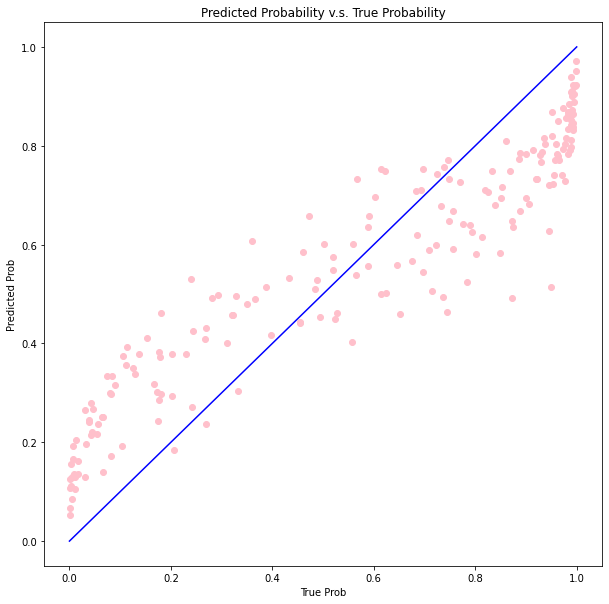

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

l=np.linspace(0,1,50)
plt.scatter(True_Prob,Prob_pred_np,color='pink') 
plt.plot(l,l,color='blue') 
plt.xlabel('True Prob')
plt.ylabel("Predicted Prob")
plt.title('Predicted Probability v.s. True Probability')
plt.show() 

# 随机梯度下降与最优化工具箱

## 随机梯度下降

以上虽然使用简单的梯度下降方法完成了最优化，然而在处理大型数据时，以上的计算方法需要计算一个很大的矩阵和向量的乘积，在更大的模型中这个运算更加复杂，而且每次迭代都需要计算一次，计算效率比较低。

注意到，对于损失函数（目标函数）:$$\ln{L}=\frac{1}{N}\sum_{i=1}^{N}\left[1\left\{y_i=1\right\}\ln{Prob_i}+\left(1\left\{y_i=0\right\}\right)\ln{\left(1-Prob_i\right)}\right]$$实际上是一个样本平均，根据大数定律应该收敛到其期望。

一个很自然的想法是，我们可以不适用全部数据计算期望，而是将所有数据随机分成几个批次（batch），在每个批次（batch）上分别计算目标函数和梯度，并进行迭代即可。这种计算方法由于引入了随机性，因而被成为 **随机梯度下降** （ **stochastic gradient descent, SGD** ）。

为了使用随机梯度下降方法，我们可以将$N$个数据分为$M$份，方便期间我们不妨假设每一份数据（批次）的数据量为$n$，那么随机梯度下降即在每个批次上执行：$$b^{(t+1)}=b^{(t)}-\eta\nabla_b \left(-\ln{L}\right)^{(m)}$$其中$m=1,2,...,M$。

比如，对于以上的Logistic回归，我们可以使用如下代码实现随机梯度下降：

首先将Dataset使用DataLoader初始化，令shuffle=True，即打乱顺序（随机化），40个数据为一个batch（共5个batch）：

In [50]:
fd=binary_data()
dl=DataLoader(fd, shuffle=True, batch_size=50, drop_last=False, num_workers=0)

接下来进行迭代：

In [51]:
# 参数
# learning rate
lr=0.001
k=fd[0][0].numel()
# 设置初始值
if torch.cuda.is_available():
    b=torch.rand(k+1, requires_grad=True, device=0)
else:
    b=torch.rand(k+1, requires_grad=True)
# 迭代8000次
for i in range(8000):
    for x,y in dl:
        # 计算梯度
        Xb=torch.mv(x,b[:-1])+b[-1]
        logeXb=torch.log1p(torch.exp(Xb))
        LL=-torch.mean(y*(Xb-logeXb)+(1-y)*(-logeXb))
        LL.backward()
        with torch.no_grad():
            b.sub_(lr*b.grad)
            # 梯度清零 
            b.grad.zero_()
print(b)

tensor([ 0.7284,  1.5331, -0.7740, -1.4154,  0.8464,  0.3294], device='cuda:0',
       requires_grad=True)


以上代码与之前的版本相似度很高，然而在这里，我们将每次的迭代嵌入到了每个批次中，从而实现了随机梯度下降。在这里涉及到两个循环：

* 外层的循环中我们循环了1000次，每一次都使用了所有数据，我们称为一个epoch
* 内层的循环是对batches进行循环，每一次循环使用一个batch，我们称为一个iteration

## PyTorch中优化器的使用

以上我们根据梯度下降的原理手写了原始的梯度下降方法和随机梯度下降方法。然而两种手写的优化方法使用起来比较繁琐且不够稳健。为了解决这个问题，我们可以使用PyTorch中自带的优化器。

在PyTorch中，torch.optim包中提供了最优化所需要的函数。我们可以使用如下代码导入优化器：

In [52]:
import torch.optim as optim

In [53]:
optimizer=optim.SGD([b], lr=0.01)

注意SGD的第一个参数为一个可迭代的参数列表，所以我们将b放在了一个列表里面。lr为学习率。

接下来我们可以使用如下代码进行迭代：

In [54]:
k=fd[0][0].numel()

# 设置初始值
if torch.cuda.is_available():
    b=torch.rand(k+1, requires_grad=True, device=0)
else:
    b=torch.rand(k+1, requires_grad=True)
ll_sgd=[]
# 初始化
dl=DataLoader(fd, shuffle=True, batch_size=50, drop_last=False, num_workers=0)
optimizer=optim.SGD([b], lr=0.001)
for i in range(8000):
    for x,y in dl:
        Xb=torch.mv(x,b[:-1])+b[-1]
        logeXb=torch.log1p(torch.exp(Xb))
        LL=-torch.mean(y*(Xb-logeXb)+(1-y)*(-logeXb))
        ll_sgd.append(LL.data.cpu().numpy())
        # 梯度清零
        optimizer.zero_grad()
        # 计算梯度
        LL.backward()
        # 迭代
        optimizer.step()
print(b)
ll_sgd=np.array(ll_sgd)

tensor([ 0.7396,  1.5575, -0.7874, -1.4386,  0.8583,  0.3338], device='cuda:0',
       requires_grad=True)


随机梯度下降方法虽然解决了大量数据的计算问题，然而也有一些缺点，比如：

* 在SGD中，学习率是恒定的，而选择合适的学习率就非常重要了。太小的学习率需要迭代太多次，而太大的学习率会导致结果不稳定甚至不收敛
* 在SGD中，所有参数使用同样的学习率，然而每个变量的分布不相同、参数的大小不相同，对于不同参数设定不同的学习率，或者给予不同的更新幅度是必要的
* 随机梯度下降仍然不能解决局部最优的问题。此外Dauphin等人(2014)发现在神经网络中，存在大量鞍点（saddle point），是梯度下降面临的主要问题。

为此在随机梯度下降的基础上，有很多扩展的方法。我们这里介绍SGD的几种简单扩展和在PyTorch中的实现。

### 加入动量

**动量** （ **Momentum** ）就像在物理的意义一样，使得参数有保持其运动轨迹的趋势。令$$v^{(t)}=\alpha v^{(t-1)}+\eta\nabla_b Q\left(b^{(t)}\right)$$为动量（一个向量），其中$\eta$为学习率，而$\alpha$为一个衰减因子（在0到1之间，比如0.9），该因子决定了过去的导数决定现在方向的大小。从这个方程中可以看到，动量不仅仅使用了当前梯度的信息，还综合使用了过去所有期的梯度。接下来，使用：
$$b^{(t+1)}=b^{(t)}-v^{(t)}$$进行迭代。

![](pic/momentum.gif "动量")

在PyTorch中，可以直接在optim.SGD中加入momentum参数加入动量：

In [55]:
k=fd[0][0].numel()

# 设置初始值
if torch.cuda.is_available():
    b=torch.rand(k+1, requires_grad=True, device=0)
else:
    b=torch.rand(k+1, requires_grad=True)

# 初始化
dl=DataLoader(fd, shuffle=True, batch_size=50, drop_last=False, num_workers=0)
optimizer=optim.SGD([b], lr=0.001, momentum=0.9)
ll_momentum=[]
for i in range(8000):
    for x,y in dl:
        Xb=torch.mv(x,b[:-1])+b[-1]
        logeXb=torch.log1p(torch.exp(Xb))
        LL=-torch.mean(y*(Xb-logeXb)+(1-y)*(-logeXb))
        ll_momentum.append(LL.data.cpu().numpy())
        # 梯度清零
        optimizer.zero_grad()
        # 计算梯度
        LL.backward()
        # 迭代
        optimizer.step()
print(b)
ll_momentum=np.array(ll_momentum)

tensor([ 0.9944,  1.9939, -1.1169, -1.8782,  1.1267,  0.4115], device='cuda:0',
       requires_grad=True)


### AdaGrad

为了解决每个参数的学习率都相同的文艺，一个解决方法是使用 **适应性梯度算法** （ **adaptive gradient algorithm** ），即 **AdaGrad** 。这个方法的思路是给那些变化比较小的特征（比如比较稀疏的特征）以更大的学习率，从而加快训练。

如果我们记梯度为$g^{(t)}=\nabla_b Q\left(b^{(t)}\right)$，令$$G=\sum_{t=1}^T g^{(t)}g^{(t)'}$$为梯度的外积之和（每次迭代的和），那么$G$的对角线元素即为：$$G_{ii}=\sum_{t=1}^T \left(g_i^{(t)}\right)^2$$ 接下来在每次更新中，对于第$i$个参数，使用：$$b^{(t+1)}_i=b^{(t)}_i-\frac{\eta}{\sqrt{G_{ii}}}\nabla_b Q\left(b^{(t)}\right)$$进行迭代更新。

在AdaGrad中，每个参数的更新过程中，实际的学习率为$\frac{\eta}{\sqrt{G_{ii}}}$，是随着梯度绝对大小的变化而变化的：如果梯度相对较小，会放大学习率；而如果梯度相对较大，会使用较小的学习率。

![](pic/adagrad.gif "AdaGrad")

在PyTorch中，可以使用optim.Adagrad来实现该算法：

In [56]:
k=fd[0][0].numel()
# 设置初始值
if torch.cuda.is_available():
    b=torch.rand(k+1, requires_grad=True, device=0)
else:
    b=torch.rand(k+1, requires_grad=True)

# 初始化
dl=DataLoader(fd, shuffle=True, batch_size=50, drop_last=False, num_workers=0)
optimizer=optim.Adagrad([b], lr=0.001)
ll_adagrad=[]
for i in range(8000):
    for x,y in dl:
        Xb=torch.mv(x,b[:-1])+b[-1]
        logeXb=torch.log1p(torch.exp(Xb))
        LL=-torch.mean(y*(Xb-logeXb)+(1-y)*(-logeXb))
        ll_adagrad.append(LL)
        # 梯度清零
        optimizer.zero_grad()
        # 计算梯度
        LL.backward()
        # 迭代
        optimizer.step()
print(b)
ll_adagrad=np.array(ll_adagrad)

tensor([0.5402, 0.8005, 0.3355, 0.3730, 0.6691, 0.2679], device='cuda:0',
       requires_grad=True)


### RMSProp

**Root Mean Square Propagation**，简称**RMSProp**，同样也是一个适应性学习率的算法。该算法将AdaGrad中的权重$G_{ii}=\sum_{t=1}^T \left(g_i^{(t)}\right)^2$使用类似于Momentum的方法来进行更新：$$v_i^{(t)}=\gamma v_i^{(t-1)}+\left(1-\gamma\right)\left(g_i^{(t)}\right)^2$$使用：$$b^{(t+1)}_i=b^{(t)}_i-\frac{\eta}{\sqrt{v_i^{(t)}}}\nabla_b Q\left(b^{(t)}\right)$$进行迭代更新。

PyTorch中可以使用optim.RMSprop实现：

In [57]:
k=fd[0][0].numel()
# 设置初始值
if torch.cuda.is_available():
    b=torch.rand(k+1, requires_grad=True, device=0)
else:
    b=torch.rand(k+1, requires_grad=True)

# 初始化
dl=DataLoader(fd, shuffle=True, batch_size=50, drop_last=False, num_workers=0)
optimizer=optim.RMSprop([b], lr=0.001)
ll_rmsprop=[]
for i in range(8000):
    for x,y in dl:
        Xb=torch.mv(x,b[:-1])+b[-1]
        logeXb=torch.log1p(torch.exp(Xb))
        LL=-torch.mean(y*(Xb-logeXb)+(1-y)*(-logeXb))
        ll_rmsprop.append(LL)
        # 梯度清零
        optimizer.zero_grad()
        # 计算梯度
        LL.backward()
        # 迭代
        optimizer.step()
print(b)
ll_rmsprop=np.array(ll_rmsprop)

tensor([ 0.9949,  1.9951, -1.1177, -1.8793,  1.1273,  0.4118], device='cuda:0',
       requires_grad=True)


### Adam

**Adaptive Moment Estimation**，简称**Adam**，同时结合了RMSProp和Momentum，分别使用两个学习率对动量和权重进行更新：$$m_i^{(t)}=\gamma_1 v_i^{(m-1)}+\left(1-\gamma_1\right)g_i^{(t)} \\ v_i^{(t)}=\gamma_2 v_i^{(t-1)}+\left(1-\gamma_2\right)\left(g_i^{(t)}\right)^2$$然后计算：$$\hat{m_i}=\frac{m_i^{(t)}}{1-\gamma_1^t} \\ \hat{v_i}=\frac{v_i^{(t)}}{1-\gamma_2^t}$$最后进行迭代更新：$$b^{(t+1)}_i=b^{(t)}_i-\eta\frac{\hat{m_i}}{\sqrt{\hat{v_i}}}$$

PyTorch中可以使用optim.Adam来完成：

In [58]:
k=fd[0][0].numel()
# 设置初始值
if torch.cuda.is_available():
    b=torch.rand(k+1, requires_grad=True, device=0)
else:
    b=torch.rand(k+1, requires_grad=True)

# 初始化
dl=DataLoader(fd, shuffle=True, batch_size=50, drop_last=False, num_workers=0)
optimizer=optim.Adam([b], lr=0.001)
ll_adam=[]
for i in range(8000):
    for x,y in dl:
        Xb=torch.mv(x,b[:-1])+b[-1]
        logeXb=torch.log1p(torch.exp(Xb))
        LL=-torch.mean(y*(Xb-logeXb)+(1-y)*(-logeXb))
        ll_adam.append(LL)
        # 梯度清零
        optimizer.zero_grad()
        # 计算梯度
        LL.backward()
        # 迭代
        optimizer.step()
print(b)
ll_adam=np.array(ll_adam)

tensor([ 0.9946,  1.9945, -1.1178, -1.8790,  1.1272,  0.4119], device='cuda:0',
       requires_grad=True)


除此之外还有AdaDelta、AdaMax、Nadam、AMSGrad等一系列算法，再次不再赘述。

我们可以对比以上这些算法的迭代效果：

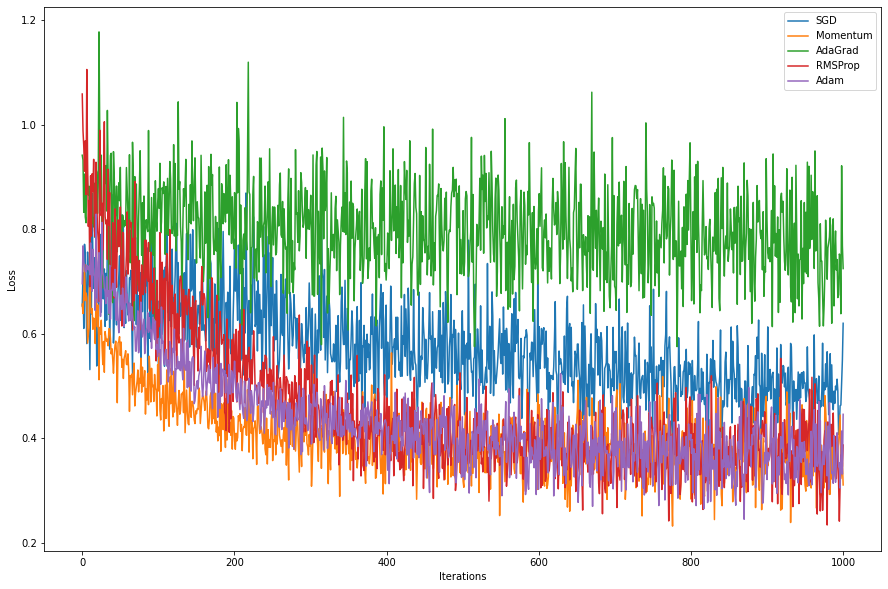

In [59]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

l=np.linspace(0,1000,1000)
plt.plot(l,ll_sgd[0:4000:4],label='SGD')
plt.plot(l,ll_momentum[0:4000:4],label='Momentum')
plt.plot(l,ll_adagrad[0:4000:4],label='AdaGrad')
plt.plot(l,ll_rmsprop[0:4000:4],label='RMSProp')
plt.plot(l,ll_adam[0:4000:4],label='Adam')
plt.xlabel('Iterations')
plt.ylabel("Loss")
plt.legend()
plt.show() 

值得注意的是，虽然适应性学习率可以自动调整学习率，对于鞍点问题等情况有较好的表现，并且相较于SGD和带Momentum的SGD有更快的速度，但是最终收敛结果可能没有使用优良参数的简单SGD好，所以不同模型究竟使用何种优化算法并不是一成不变的。一般而言，对于稀疏、高维的数据可以使用Adam等进行尝试，而简单模型SGD就可以达到足够好的效果。一个比较简单的方法是先使用Adam等方法迭代，经过一定时间迭代后再使用SGD。

下图比较了不同方法对于局部最优的性能：

![](pic/sgd_local_minimum.gif "局部最优")

而下图则比较了不同方法逃离鞍点的性能：

![](pic/sgd_saddle_point.gif "局部最优")

## 动态调整学习率

无论是简单的SGD还是Adam，一个常见的做法是使用动态的学习率$\eta$。比如，一个一般的做法是在迭代的初期使用较高的学习率，而后期则使用较低的学习率。在PyTorch中，可以使用optim.lr_scheduler根据epoch迭代的次数对学习率进行更新。

一个比较一般化的调整方法是optim.lr_scheduler.LambdaLR，该方法需要提供：
* optimizer：需要调整学习率的优化器
* lr_lambda：一个根据epoch迭代次数计算出学习率的函数

不过PyTorch本身集成了很多调整学习率的方案，比如：
* StepLR: optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.1)：使用一个阶梯函数，step_size代表两次调整学习率之间epoch迭代次数，而gamma为每次更新学习率时，都将学习率乘以gamma，从而gamma越大衰减越慢
* ExponentialLR：optim.lr_scheduler.ExponentialLR(optimizer, gamma)：每个epoch都将学习率乘以gamma
* CosineAnnealingLR：optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max, eta_min=0)：余弦退火算法，T_max为周期

除此之外还有很多方案，https://pytorch.org/docs/stable/optim.html 中提供了方案列表。

为了使用lr_scheduler，我们首先要进行初始化：

In [60]:
optimizer=optim.SGD([b], lr=0.001, momentum=0.9)
lr_scheduler=torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)

然后在迭代时，每个epoch内进行一次step()即可：

In [61]:
LR=[]
for i in range(5000):
    for x,y in dl:
        Xb=torch.mv(x,b[:-1])+b[-1]
        logeXb=torch.log1p(torch.exp(Xb))
        LL=-torch.mean(y*(Xb-logeXb)+(1-y)*(-logeXb))
        # 梯度清零
        optimizer.zero_grad()
        # 计算梯度
        LL.backward()
        # 迭代
        optimizer.step()
    lr_scheduler.step()
    LR.append(lr_scheduler.get_last_lr())
print(b)

tensor([ 0.9945,  1.9946, -1.1176, -1.8790,  1.1273,  0.4117], device='cuda:0',
       requires_grad=True)


注意我们更新学习率时是针对每一个epoch进行一次更新，而非每次迭代都更新。

我们可以查看学习率的更新情况：

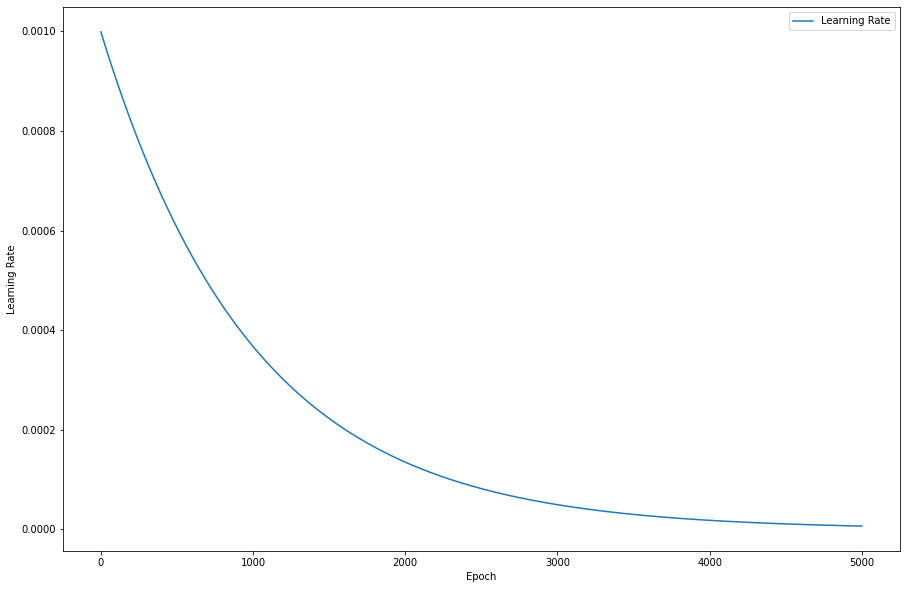

In [62]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

l=np.linspace(0,len(LR),len(LR))
plt.plot(l,np.array(LR),label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel("Learning Rate")
plt.legend()
plt.show() 

可以发现按照这个计划，迭代结束时学习率几乎收敛到0。

* 图片参考：
    * https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c 